In [45]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf

# The rest of your TensorFlow code

In [46]:
import tensorflow

In [47]:
!pip install tensorflow

In [48]:
import tensorflow

In [49]:
%pip install tensorflow-metal


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 1:
    tf.config.experimental.set_memory_growth(physical_devices[1], True)
    tf.config.set_visible_devices(physical_devices[1], 'GPU')



Note: you may need to restart the kernel to use updated packages.
Num GPUs Available:  0


In [50]:
import glob as gb
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

In [51]:
df=keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage/',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [52]:
df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
class_names=df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [54]:
len(df)

68

# size

In [55]:
inputsize=256
batch=32
channel=3

In [56]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 2 1 1 0 0 0 1 0 0 1 0 1 1 2 0 1 0 0 1 0 1 1 0 2 1 0 0 0 1 1]


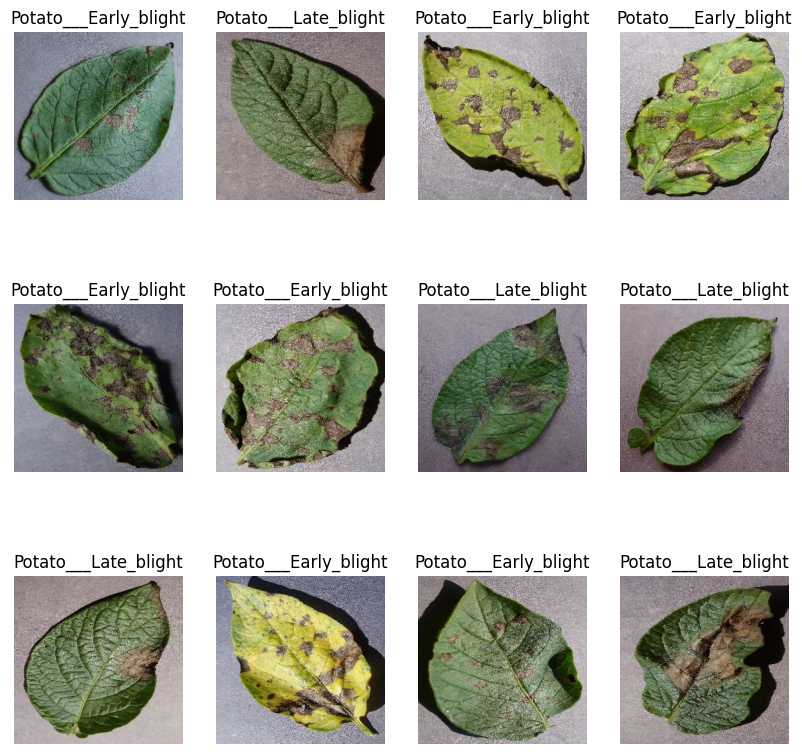

In [57]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [58]:
train_split=int(len(df)*.80)

In [59]:
trainds=df.take(train_split)

In [60]:
trainds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
testds=df.skip(train_split)

In [62]:
valdf=testds.take(6)
testds=testds.skip(6)

In [63]:
trainds=trainds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valdf=valdf.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testds=testds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

# Updated preprocessing pipeline
resize_rescale = Sequential([
    Resizing(256, 256),            # Resize images to 256x256
    Rescaling(1.0 / 255)           # Rescale pixel values to [0, 1]
])

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation

# Data augmentation pipeline
data_augmentation = Sequential([
    RandomFlip('horizontal_and_vertical'),  # Randomly flip images
    RandomRotation(0.2)                     # Randomly rotate images
])

print("Data augmentation pipeline created successfully!")

Data augmentation pipeline created successfully!


In [66]:
inp=(batch,inputsize,inputsize,channel)

In [67]:
model=Sequential([
    resize_rescale,
    data_augmentation,
    Conv2D(32,(3,3),activation='relu',input_shape=inp),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
  
    Flatten(),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')
])

In [68]:
model.build(inp)

In [69]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [79]:
EPOCHS=40

In [80]:
history=model.fit(
    trainds,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data=valdf
)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 589ms/step - accuracy: 0.9775 - loss: 0.0599 - val_accuracy: 0.9740 - val_loss: 0.0437
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 606ms/step - accuracy: 0.9921 - loss: 0.0416 - val_accuracy: 0.9792 - val_loss: 0.0558
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 632ms/step - accuracy: 0.9907 - loss: 0.0265 - val_accuracy: 0.9427 - val_loss: 0.1378
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 645ms/step - accuracy: 0.9947 - loss: 0.0226 - val_accuracy: 0.9219 - val_loss: 0.2493
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 706ms/step - accuracy: 0.9869 - loss: 0.0309 - val_accuracy: 0.9948 - val_loss: 0.0139
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 716ms/step - accuracy: 0.9891 - loss: 0.0491 - val_accuracy: 0.9948 - val_loss: 0.0188
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 812ms/step - accuracy: 0.9876 - loss: 0.0360 - val_accuracy: 0.9844 - val_loss: 0.0516
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 782ms/step - accuracy: 0.9942 - loss: 0.0226 - val_accu

In [73]:
import matplotlib.pyplot as plt2

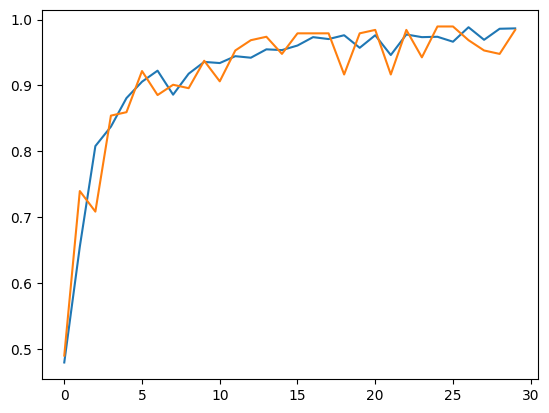

In [74]:
plt2.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

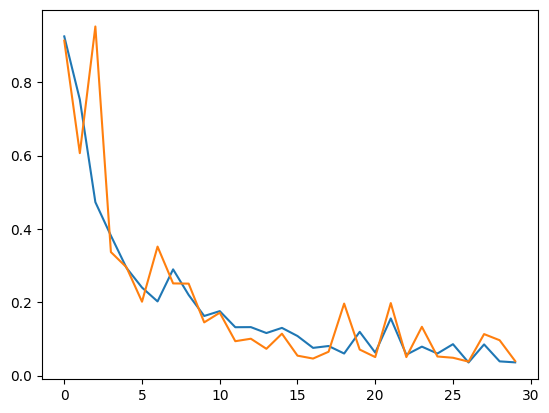

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [76]:
max(history.history['val_accuracy'])

0.9895833134651184

In [77]:
model.evaluate(testds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9856 - loss: 0.0557


[0.07400797307491302, 0.9784482717514038]

In [82]:
model_version = 1
model.save('analyzer.h5')  # Use .keras or .h5 extension